In [ ]:
!pip install kaggle
!mkdir .kaggle

In [ ]:
import json
token = {"username":"fatemehy","key":"e6177841494493a99d3da8b61bab2fb1"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json
!kaggle config set -n path -v{/content}
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets list

- path is now set to: {/content}
ref                                                             title                                                size  lastUpdated          downloadCount  
--------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
allen-institute-for-ai/CORD-19-research-challenge               COVID-19 Open Research Dataset Challenge (CORD-19)    3GB  2020-06-10 00:09:23           2972  
roche-data-science-coalition/uncover                            UNCOVER COVID-19 Challenge                          179MB  2020-05-21 18:57:53           3203  
kwullum/fatal-police-shootings-in-the-us                        Fatal Police Shootings in the US                      1MB  2017-09-22 19:18:21          15284  
Cornell-University/arxiv                                        ArXiv Metadata                                        2GB  2020-05-06 23:18:35             70  
yash612

In [ ]:
!kaggle datasets list -s insurance
!kaggle datasets download -d mirichoi0218/insurance     -p /content
!unzip \*.zip

ref                                                 title                                       size  lastUpdated          downloadCount  
--------------------------------------------------  -----------------------------------------  -----  -------------------  -------------  
hhs/health-insurance-marketplace                    Health Insurance Marketplace               829MB  2017-05-01 20:16:50          16456  
hhs/health-insurance                                Health Insurance Coverage                    3KB  2017-03-02 18:40:23           4044  
uciml/caravan-insurance-challenge                   Caravan Insurance Challenge                266KB  2016-11-28 03:02:55           5039  
moneystore/agencyperformance                        Insurance Data                               5MB  2016-12-02 12:13:42           3760  
mhdzahier/travel-insurance                          Travel Insurance                           463KB  2019-01-28 01:43:39           2359  
mirichoi0218/insurance     

In [17]:
# Load data into Pandas Dataframe
import pandas as pd
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as pl
import seaborn as sns
import warnings
# warnings.filterwarnings('ignore')
# data = pd.read_csv('../input/insurance.csv')
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [18]:
#Does the dataset include any missing values? If so, delete the missing values entries
df.isnull().sum(axis = 0)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [19]:
#Preprocessing
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(df['sex'])
df['sex']= encoder.transform(df['sex'])

encoder.fit(df['region'])
df['region']= encoder.transform(df['region'])

encoder.fit(df['smoker'])
df['smoker']= encoder.transform(df['smoker'])
# breast_cencer.drop('id',axis=1,inplace=True)
# df.drop('Unnamed: 32',axis=1,inplace=True)
# breast_cancer['diagnosis'] = breast_cancer['diagnosis'].map({'M':1,'B':0})
# breast_cancer.head()
df.dropna()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [20]:
df.corr()['charges'].sort_values()

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

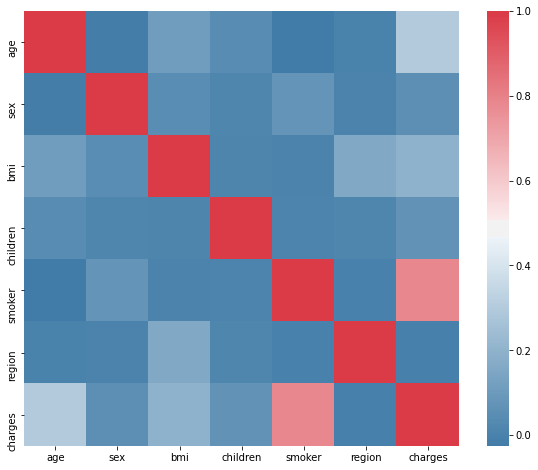

In [21]:
f, ax = pl.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax)

Text(0.5, 1.0, 'Distribution of charges for non-smokers')

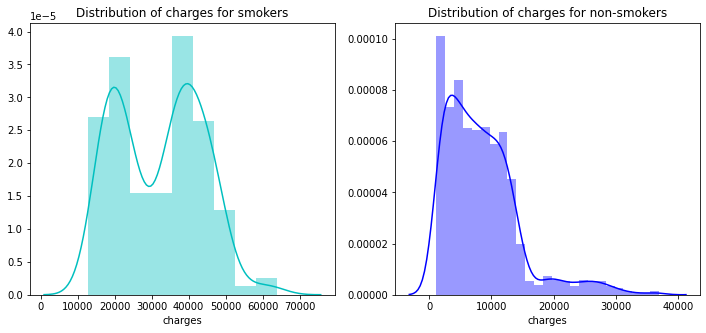

In [22]:
f= pl.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(df[(df.smoker == 1)]["charges"],color='c',ax=ax)
ax.set_title('Distribution of charges for smokers')

ax=f.add_subplot(122)
sns.distplot(df[(df.smoker == 0)]['charges'],color='b',ax=ax)
ax.set_title('Distribution of charges for non-smokers')

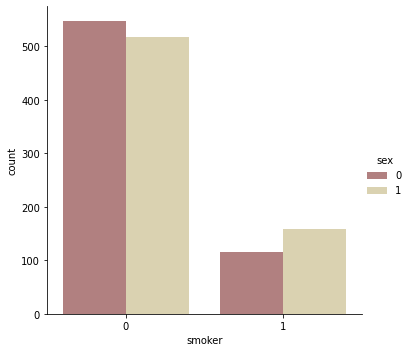

In [23]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="pink", data=df)

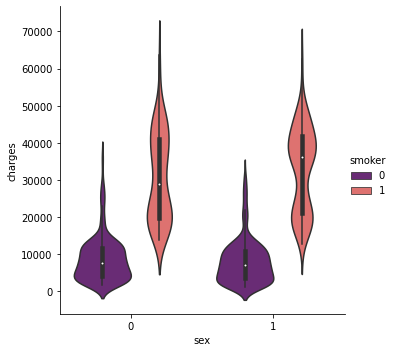

In [24]:
sns.catplot(x="sex", y="charges", hue="smoker",
            kind="violin", data=df, palette = 'magma')

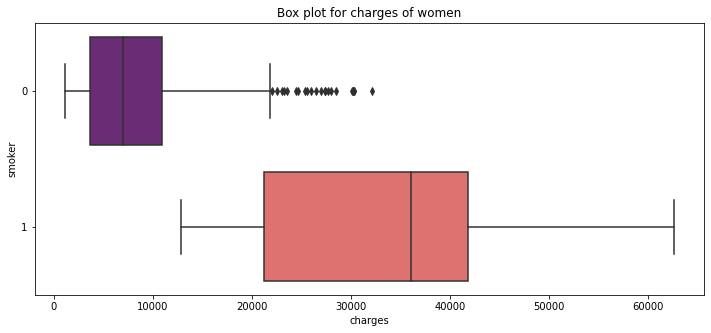

In [25]:
pl.figure(figsize=(12,5))
pl.title("Box plot for charges of women")
sns.boxplot(y="smoker", x="charges", data =  df[(df.sex == 1)] , orient="h", palette = 'magma')

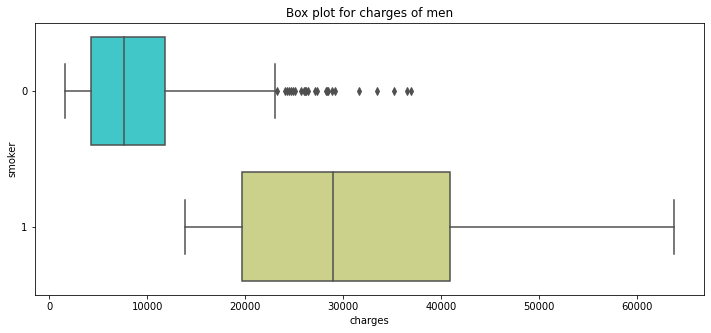

In [26]:
pl.figure(figsize=(12,5))
pl.title("Box plot for charges of men")
sns.boxplot(y="smoker", x="charges", data =  df[(df.sex == 0)] , orient="h", palette = 'rainbow')

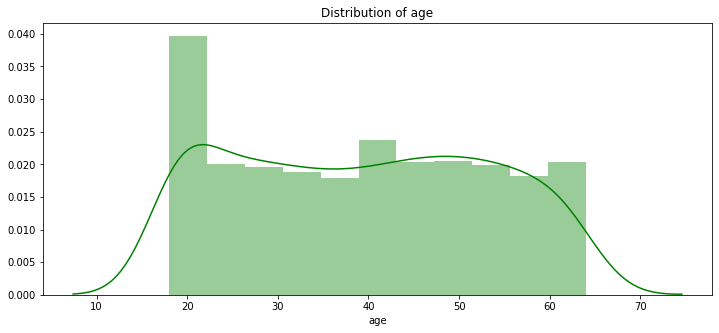

In [27]:
pl.figure(figsize=(12,5))
pl.title("Distribution of age")
ax = sns.distplot(df["age"], color = 'g')

Text(0.5, 1.0, 'The number of smokers and non-smokers (18 years old)')

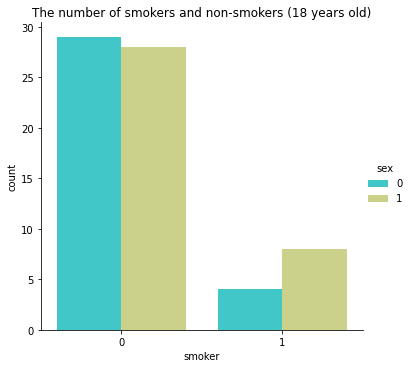

In [28]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="rainbow", data=df[(df.age == 18)])
pl.title("The number of smokers and non-smokers (18 years old)")


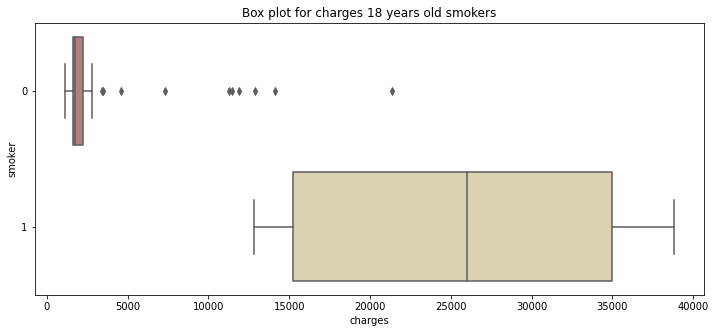

In [30]:
pl.figure(figsize=(12,5))
pl.title("Box plot for charges 18 years old smokers")
sns.boxplot(y="smoker", x="charges", data = df[(df.age == 18)] , orient="h", palette = 'pink')

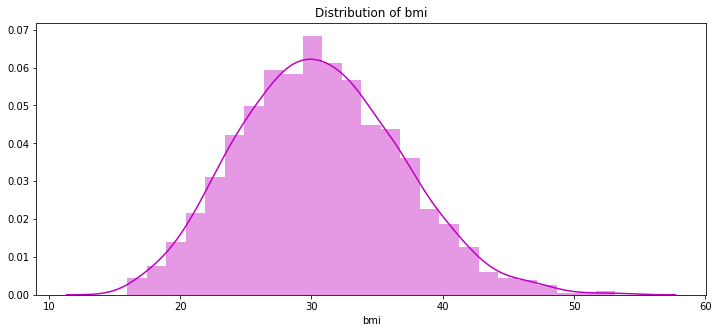

In [31]:
pl.figure(figsize=(12,5))
pl.title("Distribution of bmi")
ax = sns.distplot(df["bmi"], color = 'm')

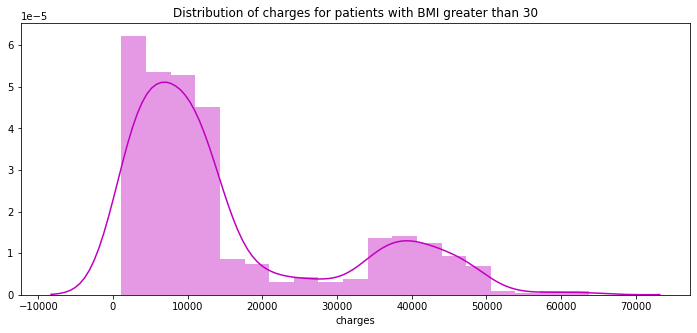

In [32]:
pl.figure(figsize=(12,5))
pl.title("Distribution of charges for patients with BMI greater than 30")
ax = sns.distplot(df[(df.bmi >= 30)]['charges'], color = 'm')

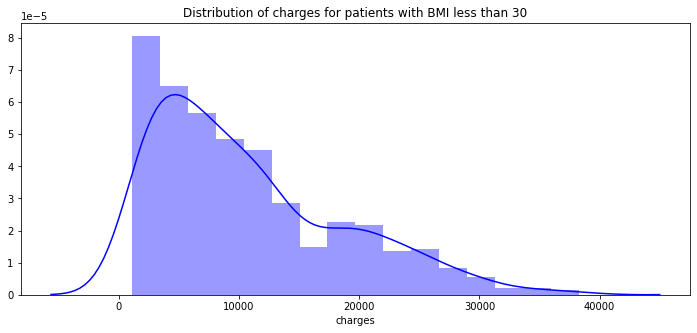

In [33]:
pl.figure(figsize=(12,5))
pl.title("Distribution of charges for patients with BMI less than 30")
ax = sns.distplot(df[(df.bmi < 30)]['charges'], color = 'b')

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(df.iloc[:,0:5])
y = df.iloc[:,6].values
print(y)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=0)
X_test, X_val, y_test, y_val = train_test_split(X_train, y_train, test_size=0.5, random_state=1) 

#using DecisionTree Resressor Model
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(criterion='mse', random_state=0).fit(X_train, y_train)
score = model.score(X_test, y_test)
y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error
print('MSE: ' + str(mean_squared_error(y_test, y_pred)))
from sklearn.metrics import mean_absolute_error
print('MAE: ' + str(mean_absolute_error(y_test,y_pred)))
from sklearn.metrics import r2_score
print('r2_score: '+str(r2_score(y_test, y_pred)))

#using RandomForestRegressor Model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=25, criterion='mse', random_state=0).fit(X_train, y_train)
score = model.score(X_test, y_test)
y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error
print('MSE: ' + str(mean_squared_error(y_test, y_pred)))
from sklearn.metrics import mean_absolute_error
print('MAE: '+ str(mean_absolute_error(y_test, y_pred)))
from sklearn.metrics import r2_score
print('r2_score: '+str(r2_score(y_test, y_pred)))

#using SVR model
from sklearn.svm import SVR
model = SVR(C=10000.0, kernel='poly', gamma='auto', epsilon=0.3,degree=3).fit(X_train, y_train)
score = model.score(X_test, y_test)
y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error
print('MSE: ' + str(mean_squared_error(y_test, y_pred)))
from sklearn.metrics import mean_absolute_error
print('MAE: ' + str(mean_absolute_error(y_test,y_pred)))
from sklearn.metrics import r2_score
print('r2_score: '+str(r2_score(y_test, y_pred)))


[16884.924   1725.5523  4449.462  ...  1629.8335  2007.945  29141.3603]
MSE: 342422.6459329088
MAE: 35.778270747663555
r2_score: 0.9973968041979693
MSE: 4648787.905863801
MAE: 1123.8836621411838
r2_score: 0.9646585723671826
MSE: 23406563.288778547
MAE: 2063.377803663423
r2_score: 0.8220565490716616


In [42]:
import numpy as np
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(df.iloc[:,0:5])
y = np.asarray(df.iloc[:, 6].values,dtype=int)
print(y)
print(X)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=0)
X_test, X_val, y_test, y_val = train_test_split(X_train, y_train, test_size=0.5, random_state=1) 



from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(criterion='mse', random_state=0).fit(X_train, y_train)
score = model.score(X_test, y_test)
y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error
print('MSE: ' + str(mean_squared_error(y_test, y_pred)))
from sklearn.metrics import mean_absolute_error
print('MAE: ' + str(mean_absolute_error(y_test,y_pred)))
from sklearn.metrics import r2_score
print('r2_score: '+str(r2_score(y_test, y_pred)))

#Finding the best parameter (max_depth) for the DecisionTreeRegressor Model 

from sklearn.model_selection import GridSearchCV
parameters = {'max_depth':range(3,20)}
clf = GridSearchCV(DecisionTreeRegressor(), parameters, n_jobs=4)
clf.fit(X=x, y=y)
tree_model = clf.best_estimator_
print ('best score and parameter: ',clf.best_score_, clf.best_params_) 




from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=25, criterion='mse', random_state=0).fit(X_train, y_train)
score = model.score(X_test, y_test)
y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error
print('MSE: ' + str(mean_squared_error(y_test, y_pred)))
from sklearn.metrics import mean_absolute_error
print('MAE: '+ str(mean_absolute_error(y_test, y_pred)))
from sklearn.metrics import r2_score
print('r2_score: '+str(r2_score(y_test, y_pred)))

#Finding the best parameter (n_estimator) for the RandomForestRegressor Model 

from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':range(10,100,10)}
clf = GridSearchCV(RandomForestRegressor(), parameters, n_jobs=4)
clf.fit(X=x, y=y)
tree_model = clf.best_estimator_
print ('best score and parameter: ',clf.best_score_, clf.best_params_) 


# Regression using SVR
from sklearn.svm import SVR
model = SVR(C=10000.0, kernel='poly', gamma='auto', epsilon=0.1,degree=3).fit(X_train, y_train)
score = model.score(X_test, y_test)
y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error
print('MSE: ' + str(mean_squared_error(y_test, y_pred)))
from sklearn.metrics import mean_absolute_error
print('MAE: ' + str(mean_absolute_error(y_test,y_pred)))
from sklearn.metrics import r2_score
print('r2_score: '+str(r2_score(y_test, y_pred)))


[16884  1725  4449 ...  1629  2007 29141]
[[-1.43876426 -1.0105187  -0.45332    -0.90861367  1.97058663]
 [-1.50996545  0.98959079  0.5096211  -0.07876719 -0.5074631 ]
 [-0.79795355  0.98959079  0.38330685  1.58092576 -0.5074631 ]
 ...
 [-1.50996545 -1.0105187   1.0148781  -0.90861367 -0.5074631 ]
 [-1.29636188 -1.0105187  -0.79781341 -0.90861367 -0.5074631 ]
 [ 1.55168573 -1.0105187  -0.26138796 -0.90861367  1.97058663]]
MSE: 342409.2345794393
MAE: 35.777570093457946
r2_score: 0.9973969037461801
best score and parameter:  0.8491277636431567 {'max_depth': 4}
MSE: 4707052.355694413
MAE: 1122.7475015576324
r2_score: 0.9642155960872615
best score and parameter:  0.8361541926408567 {'n_estimators': 60}
MSE: 23405619.634749718
MAE: 2063.343932067039
r2_score: 0.8220635583488756
